# Clase Práctica No.1 de Inteligencia Artificial
Antonio Elias Sánchez Soto

BDFC 301

## Análisis descriptivo del Dataset mpg de Seaborn
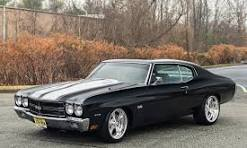

El primer paso es importar las librerías necesarias. 
- Pandas está diseñado para la manipulación y análisis de datos contenidos en DataFrames.
- Matplotlib permite crear gráficos estáticos, animado e interactivos.
- Seaborn facilita la creación de gráficos complejos con código menos complejos que Matplotlib (en algunos casos).

In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df=sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [84]:
df.shape # cantidad de filas y columnas

(398, 9)

In [85]:
# tipos de datos, valores no nulos, conteo
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Sobre los datos
- El DataFrame se compone por 398 entidades y 9 columnas con características correspondientes
- En horsepower se nota la existencia de 392 entidades no nulas, es decir, existen 6 con valores nulos
- Existen 4 valores float, 3 int y 2 object
- El número de cilindros y el año del modelo pueden ser tratados como categoriales y aplicar One-Hot o Label Encoding

In [86]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [87]:
# Conteo por años de modelos
df['model_year'].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
80    29
79    29
81    29
70    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [88]:
# Conteo por número de cilindros
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [89]:
#orden descendente por aceleración según combinación cilindros y caballos de fuerza
df.groupby(['cylinders', 'horsepower'])['acceleration'].max().sort_values(ascending=False)

cylinders  horsepower
4          71.0          24.8
           52.0          24.6
           48.0          23.7
           54.0          23.5
8          90.0          22.2
                         ... 
6          132.0         11.4
8          208.0         11.0
           225.0         11.0
           230.0          9.5
           220.0          9.0
Name: acceleration, Length: 119, dtype: float64

### Detección de valores faltantes y correción de duplicados

Los valores faltantes y duplicados pueden afectar al análisis posterior de algún modelo de aprendizaje automático. Sin embargo, esto no quiere decir que un dataset con estos componentes sea inservible. Dependiendo del conjunto de datos con el que se trabaje se debe tomar una decisión para el tratamiento de una forma u otra de dichos casos. Los valores faltantes bien pueden ser sustituidos por modas o medias, o ser eliminada por completo su fila correspondiente. En cuanto a los duplicados, si la existencia de esto no afecta a la problemática planteada no es necesario que sea borrado del conjunto.

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


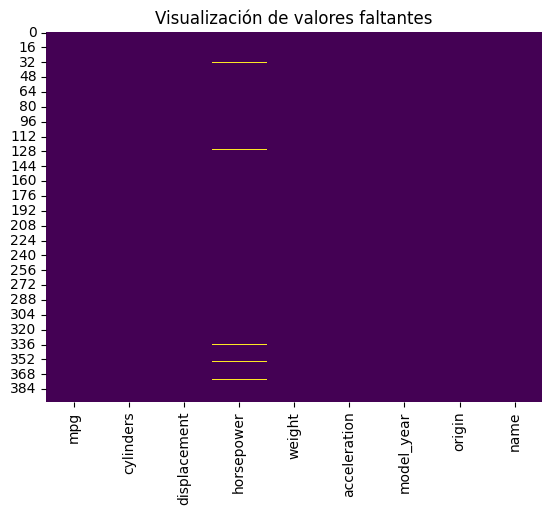

In [90]:
# Verificar valores faltantes
print(df.isnull().sum())

# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores faltantes')
plt.show()

Como bien se hizo notar al pedir la info del dataFrame en la columna horsepower existen 6 valores nulos. Se trata de un valor numérico, es una proporción pequeña la que falta por lo que una vía adecuada sería sustituir este valor por la media de la columna correspondiente.

In [91]:
df['horsepower']=df['horsepower'].fillna(df["horsepower"].mean())

En el caso de los duplicados, no nos interesa la existencia de estos, por lo que se pueden tomar medidas para eliminarlos de la siguiente forma.

In [92]:
# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

# Verificar si se eliminaron duplicados
duplicados=df.duplicated().sum()

if duplicados==0:
    print("No existen duplicados en el data frame")
else:
    print("Hay duplicados aún")

No existen duplicados en el data frame


### Tratamientos de One-Hot y Label Encoding
Estos tratamientos deben realizarse con situaciones específicas. Debemos saber los valores que puede tener una columna.
- Valores categoriales como el orígen pueden ser traducidos a números para un tratamiento adecuado durante el uso del modelo. Se trata de Label Encoding.
- En el caso de pertenecer a un tipo de dato en una columna como la cantidad de cilindros o el año del modelo puede ser apoyado en columnas extras con valores booleanos. Esto es One-Hot Encoding.

In [93]:
valores = df['origin'].unique()
valores

# Convertir la columna 'sex' en variable binaria (Label Encoding)
df['origin'] = df['origin'].map({'usa': 0, 'japan': 1, 'europe':2})

In [94]:
valores = df['cylinders'].unique()
valores

# Aplicar One-Hot Encoding a la columna 'cylinders'
df = pd.get_dummies(df, columns=['cylinders'])

In [95]:
valores = df['model_year'].unique()
valores

# Aplicar One-Hot Encoding a la columna 'model_year'
df = pd.get_dummies(df, columns=['model_year'])
df.head()

,mpg,displacement,horsepower,weight,acceleration,origin,name,cylinders_3,cylinders_4,cylinders_5,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,18.0,307.0,130.0,3504,12.0,0,chevrolet chevelle malibu,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165.0,3693,11.5,0,buick skylark 320,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150.0,3436,11.0,0,plymouth satellite,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,304.0,150.0,3433,12.0,0,amc rebel sst,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140.0,3449,10.5,0,ford torino,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Normalización y estandarización

Su objetivo es simplificar, unificar y crear un lenguaje claro con los datos que se tienen. El StandartScaler por ejemplo es una técnica en la normalización de datos en el aprendizaje automático, donde se escalan los datos para que tengan una media de 0 y una desviación estándar de 1. 
Se calcula la media(μ) y la desviación estándar(σ​) de cada característica y se transforma cada valor con la siguiente ecuación: 

$z=(x−μ)/σ​$

Así los datos están centrados en torno a cero, especialmente útil para algoritmos que dependen de distancias, como K-Means o SVM. 

In [96]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas
numeric_cols = ['mpg','displacement', 'horsepower', 'weight', 'acceleration']

# Normalizar los datos aplicando la media y desviación estándar al cálculo
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Mostrar los datos normalizados
print(df.head())

        mpg  displacement  horsepower    weight  acceleration  origin  \
0 -0.706439      1.090604    0.669196  0.630870     -1.295498       0   
1 -1.090751      1.503514    1.586599  0.854333     -1.477038       0   
2 -0.706439      1.196232    1.193426  0.550470     -1.658577       0   
3 -0.962647      1.061796    1.193426  0.546923     -1.295498       0   
4 -0.834543      1.042591    0.931311  0.565841     -1.840117       0   

                        name  cylinders_3  cylinders_4  cylinders_5  ...  \
0  chevrolet chevelle malibu        False        False        False  ...   
1          buick skylark 320        False        False        False  ...   
2         plymouth satellite        False        False        False  ...   
3              amc rebel sst        False        False        False  ...   
4                ford torino        False        False        False  ...   

   model_year_73  model_year_74  model_year_75  model_year_76  model_year_77  \
0          False        

## Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una etapa fundamental en el proceso de análisis de datos que implica examinar y resumir las características de un conjunto de datos.


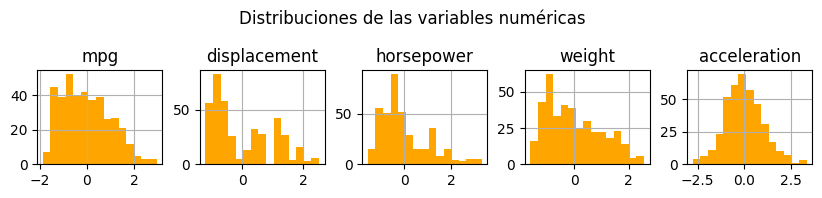

In [97]:
# Histogramas para cada variable numérica
df[numeric_cols].hist(bins=15, figsize=(10, 6), layout=(4, 5), color='orange')
plt.suptitle('Distribuciones de las variables numéricas')
plt.show()

Las distribuciones anteriores muestran la siguiente información:
- El mpg en su mayor parte posee un valor por debajo de la media. Es decir, hay una distribución asimétrica donde se concentra la mayor parte en el extremo izquierdo
- El displacement tiene su mayor concentración en el extremo izquierdo y se encuentran varios casos aislados de valores por encima de la media
- El horsepower tiene una distribución más simétrica, pero la mayor parte se concentra en un valor por debajo de la media
- El weight se distribuye muy parecido al mpg
-  El acceleration tiene una distribución simétrica donde coincide su moda con la media

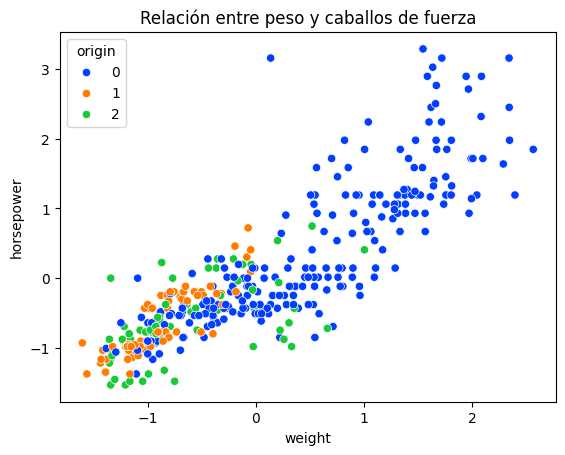

In [98]:
# Scatter plot para ver la relación entre weight y horsepower
sns.scatterplot(x='weight', y='horsepower', hue='origin', data=df, palette='bright')
plt.title('Relación entre peso y caballos de fuerza')
plt.show()

Recordando usa es 0, japan es 1 y europe es 2 en lo referido al origin. Hay una relación lineal entre el peso y los caballos de fuerza según lo que muestra el scatter plot. Además la mayoría de los vehículos con un mayor peso y caballos de fuerza a la media son de usa. Los vehículos de japan y europe se concentran por debajo de la media. Esto puede ser por la gran cantidad de modelos estadounidenses en el data frame y por la posiblidad de que los carros japoneses y europeos tengan mayor aceleración. Pues en el agrupamiento realizado de cantidad de cilindros y horsepower según acceleration se nota esta relación. Para probarlo tenemos el siguiente ploteo.

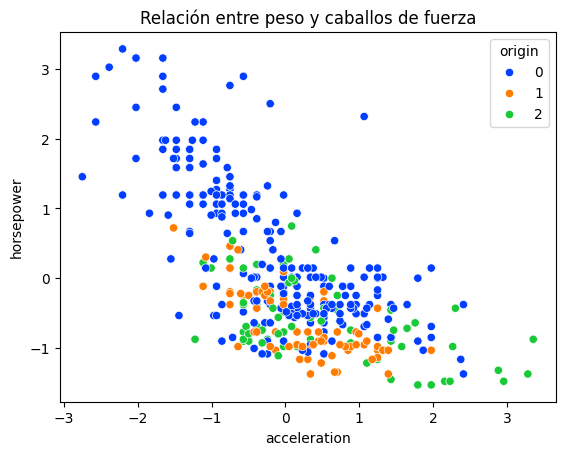

In [104]:
sns.scatterplot(x='acceleration', y='horsepower', hue='origin', data=df, palette='bright')
plt.title('Relación entre peso y caballos de fuerza')
plt.show()

¡Eureka! Hemos dado en el clavo...

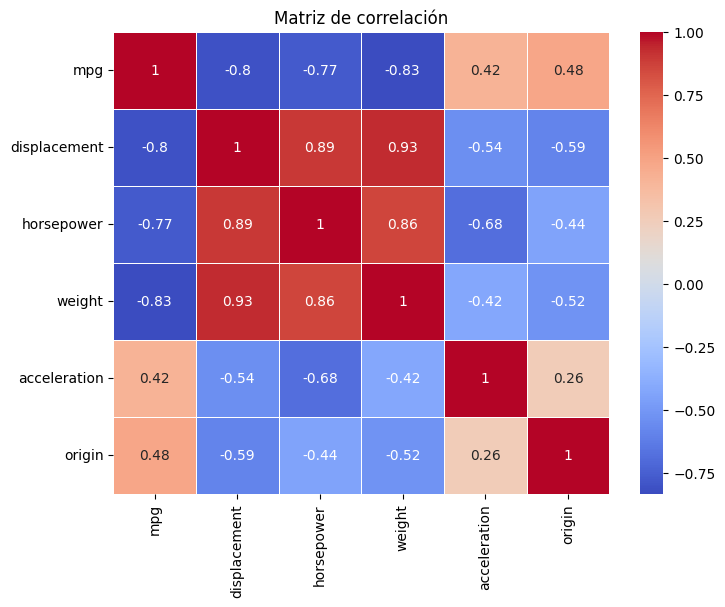

In [99]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

La matriz de correlación demuestra alguna de las relaciones ya premeditadas con la información obtenida hasta el momento. La aceleración es inversamente proporcional al peso, los caballos de fuerza y el desplazamiento. Por otro lado, obtenemos que el mpg es aún más crítico en relación con estas mismas características. A consecuencia el peso, caballos de fuerza y desplazamiento son proporcionales en gran medida.

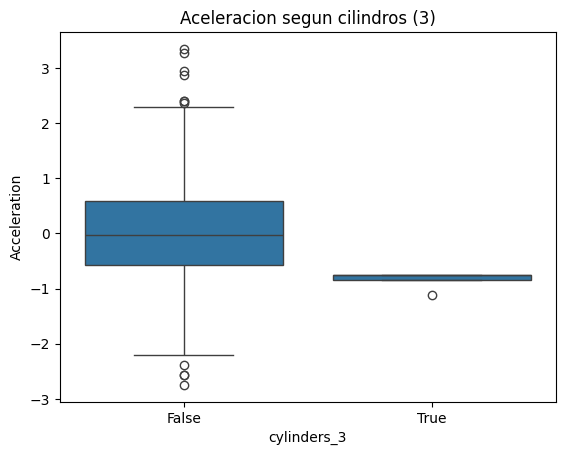

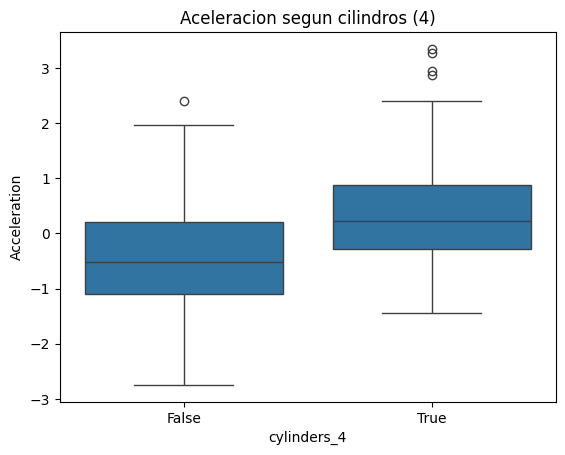

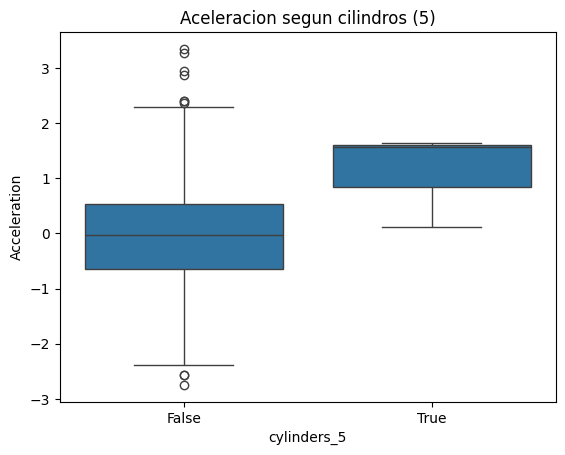

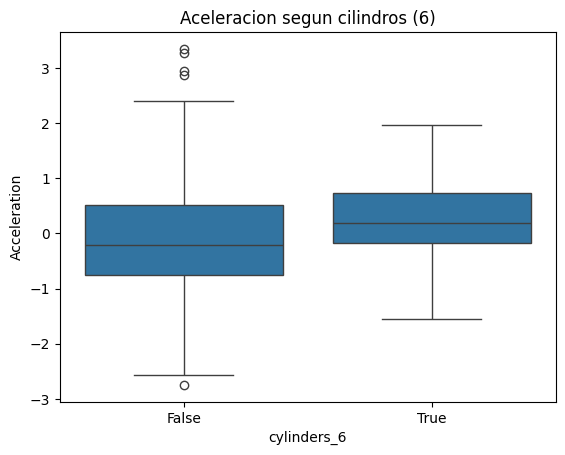

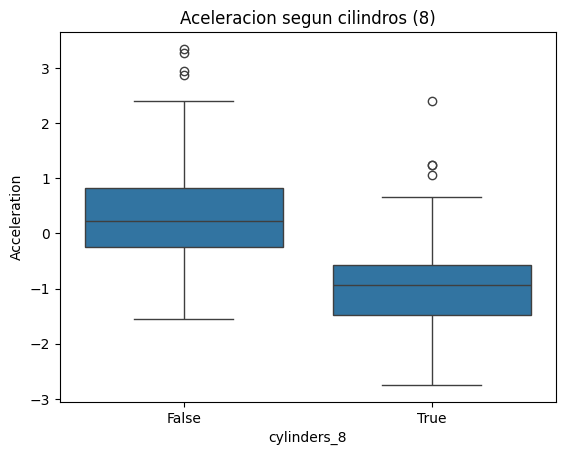

In [100]:
# Boxplot para longitud del pico
sns.boxplot(x='cylinders_3', y='acceleration', data=df)
plt.title('Aceleracion segun cilindros (3)')
plt.ylabel('Acceleration')
plt.show()

sns.boxplot(x='cylinders_4', y='acceleration', data=df)
plt.title('Aceleracion segun cilindros (4)')
plt.ylabel('Acceleration')
plt.show()

sns.boxplot(x='cylinders_5', y='acceleration', data=df)
plt.title('Aceleracion segun cilindros (5)')
plt.ylabel('Acceleration')
plt.show()

sns.boxplot(x='cylinders_6', y='acceleration', data=df)
plt.title('Aceleracion segun cilindros (6)')
plt.ylabel('Acceleration')
plt.show()

sns.boxplot(x='cylinders_8', y='acceleration', data=df)
plt.title('Aceleracion segun cilindros (8)')
plt.ylabel('Acceleration')
plt.show()


Las mayores aceleraciones las poseen aquellos con 5, 4 y 6 cilindros en orden descendente, por encima de la media. 

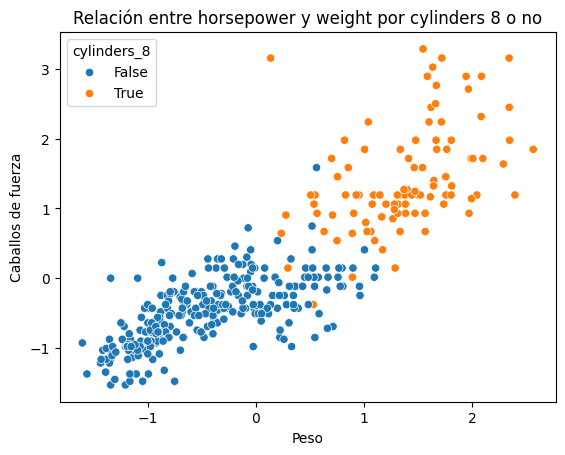

In [101]:
# Scatter plot para longitud y profundidad del pico
sns.scatterplot(x='weight', y='horsepower', hue='cylinders_8', data=df)
plt.title('Relación entre horsepower y weight por cylinders 8 o no')
plt.xlabel('Peso')
plt.ylabel('Caballos de fuerza')
plt.legend(title='cylinders_8')
plt.show()


Este gráfico demuestra como los vehículos con 8 cilindros poseen un peso y una cantidad de caballos de fuerza mayor al resto de vehículos.

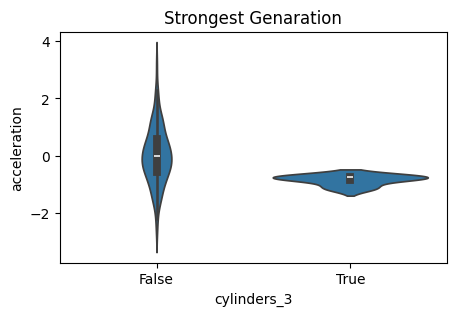

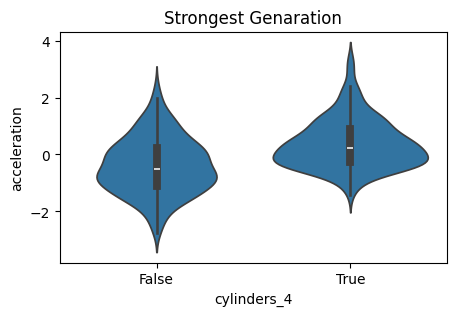

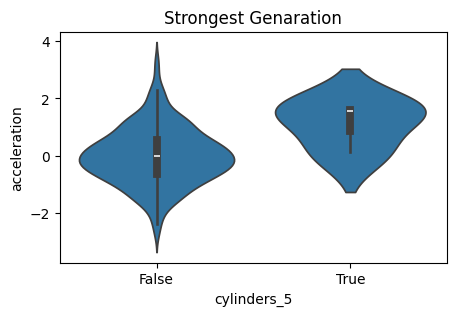

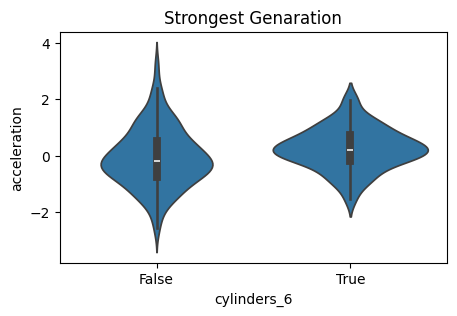

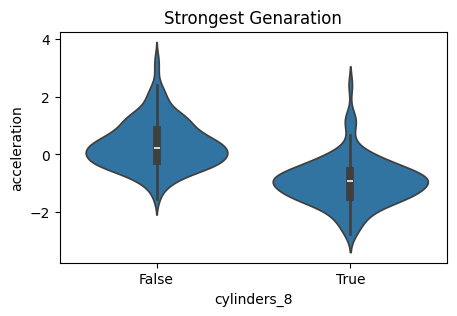

In [103]:
plt.subplots(figsize = (5,3))
plt.title('Strongest Genaration')
sns.violinplot(x = "cylinders_3", y = "acceleration",data = df)
plt.show()

plt.subplots(figsize = (5,3))
plt.title('Strongest Genaration')
sns.violinplot(x = "cylinders_4", y = "acceleration",data = df)
plt.show()

plt.subplots(figsize = (5,3))
plt.title('Strongest Genaration')
sns.violinplot(x = "cylinders_5", y = "acceleration",data = df)
plt.show()

plt.subplots(figsize = (5,3))
plt.title('Strongest Genaration')
sns.violinplot(x = "cylinders_6", y = "acceleration",data = df)
plt.show()

plt.subplots(figsize = (5,3))
plt.title('Strongest Genaration')
sns.violinplot(x = "cylinders_8", y = "acceleration",data = df)
plt.show()

En los gráficos de violín se muestran las mismas características que en los de bigotes dados anteriormente, sin embargo es más clara la distribución según cantidad de cilindros. 